Data Cleaning

In [1]:
#Setup cell
import pandas as pd

In [2]:
df = pd.read_csv('./data/spotify_history.csv')

In [3]:
df['ts'] = pd.to_datetime(df['ts'])
df['date'] = df['ts'].dt.date
df['time'] = df['ts'].dt.time
df['hour'] = df['ts'].dt.hour
df['day'] = df['ts'].dt.day_name()

In [4]:
df.rename(columns={
    'master_metadata_track_name': 'track',
    'master_metadata_album_artist_name': 'artist',
    'platform': 'device'
}, inplace=True)

Data Visualization

In [5]:
#Setup cell
import matplotlib.pyplot as plt
import seaborn as sns

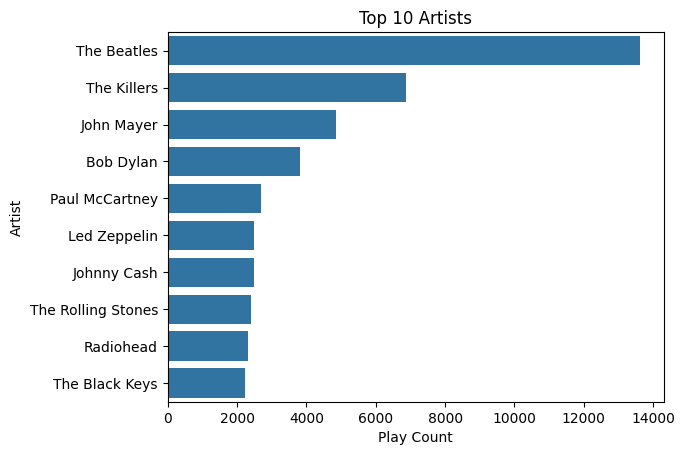

In [6]:
#Top 10 artists

top_artists = df['artist_name'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 Artists")
plt.xlabel("Play Count")
plt.ylabel("Artist")
plt.savefig("./visuals/top_artists.png")
plt.show()

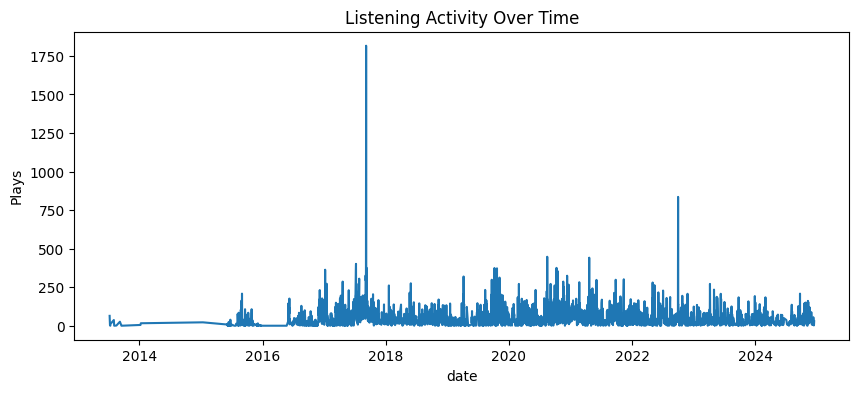

In [7]:
#Listening activity over time

daily = df.groupby('date').size()
daily.plot(kind='line', figsize=(10, 4))
plt.title("Listening Activity Over Time")
plt.ylabel("Plays")
plt.savefig("./visuals/listening_over_time.png")
plt.show()

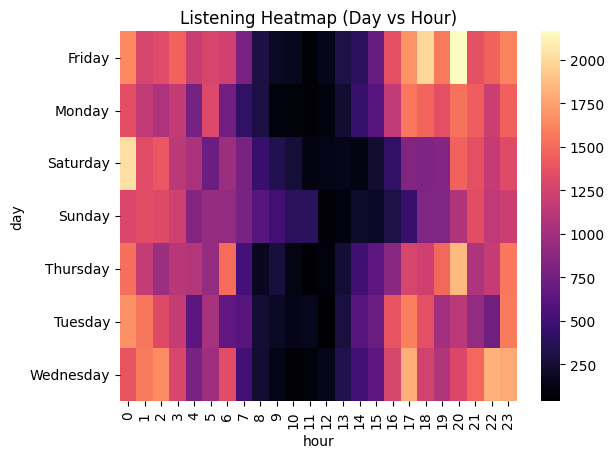

In [8]:
#Listening heatmap

pivot = df.pivot_table(index='day', columns='hour', values='track_name', aggfunc='count')
sns.heatmap(pivot, cmap="magma", annot=False)
plt.title("Listening Heatmap (Day vs Hour)")
plt.savefig("./visuals/heatmap_day_hour.png")
plt.show()

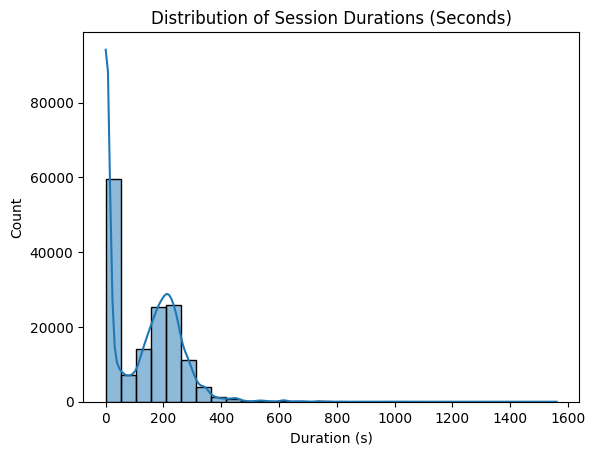

In [9]:
#Distribution of session durations

sns.histplot(df['ms_played'] / 1000, bins=30, kde=True)
plt.title("Distribution of Session Durations (Seconds)")
plt.xlabel("Duration (s)")
plt.savefig("./visuals/duration_distribution.png")
plt.show()